# Student Result Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Student_data.csv')
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [12]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [14]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [15]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


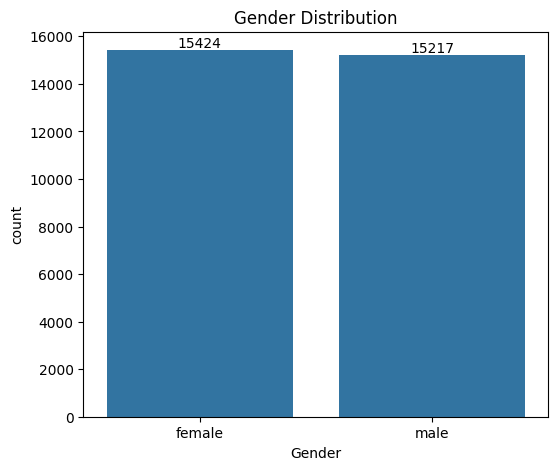

In [30]:
plt.figure(figsize=(6,5))
genderDistribution = sns.countplot(data=df, x = "Gender")
genderDistribution.bar_label(genderDistribution.containers[0])
plt.title("Gender Distribution")
plt.show()

## Analysis
- Number of Female > Number of Male

In [23]:
gp = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
gp

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


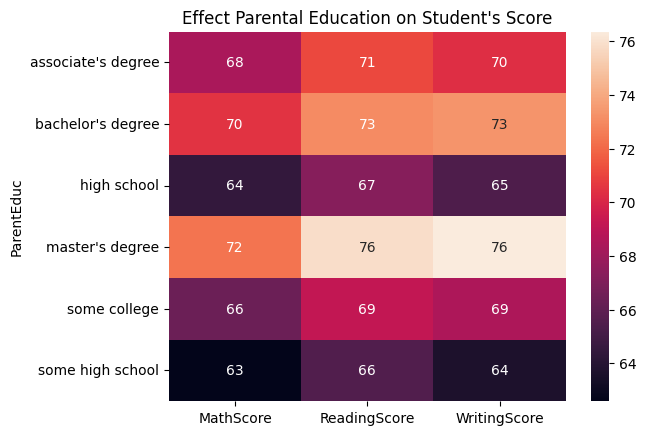

In [31]:
sns.heatmap(gp, annot=True)
plt.title("Effect Parental Education on Student's Score")
plt.show()

## Analysis

- More the parents are educated the more the score of the students

In [28]:
gp1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
gp1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


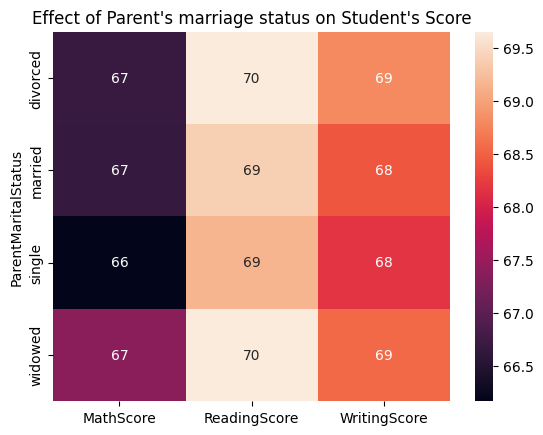

In [32]:
sns.heatmap(gp1, annot=True)
plt.title("Effect of Parent's marriage status on Student's Score")
plt.show()

## Analysis
- No major difference of the parents marital status on students score.

<Axes: xlabel='MathScore'>

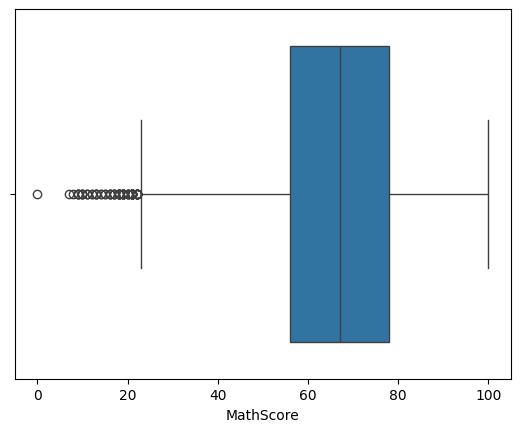

In [33]:
sns.boxplot(data = df, x = "MathScore")

<Axes: xlabel='ReadingScore'>

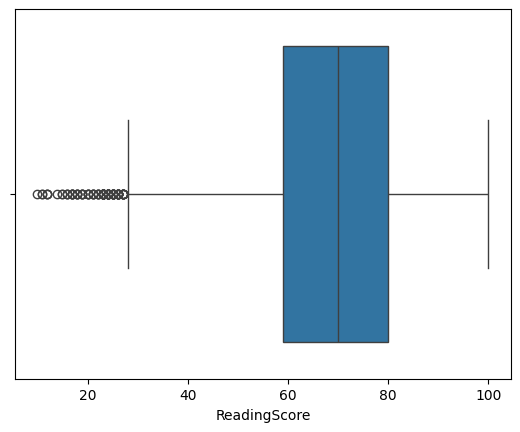

In [34]:
sns.boxplot(data = df, x = "ReadingScore")

<Axes: xlabel='WritingScore'>

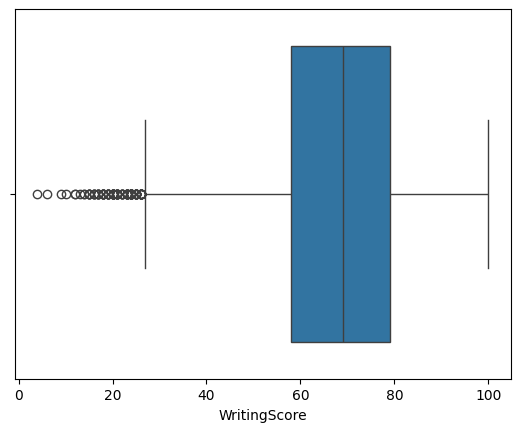

In [35]:
sns.boxplot(data = df, x = "WritingScore")

## Analysis
- Students are comparitively more weak in Math instead of Reading and Writing.

In [36]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

### Distribution of Ethnic Group

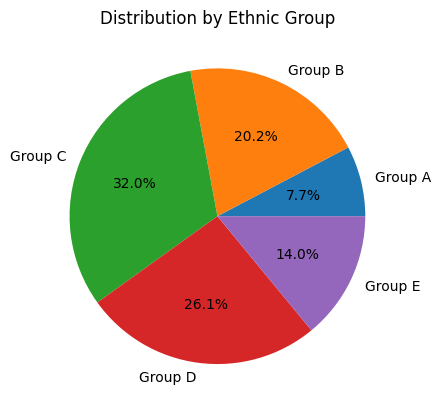

In [44]:
grpA = df.loc[df["EthnicGroup"] == "group A"].count()
grpB = df.loc[df["EthnicGroup"] == "group B"].count()
grpC = df.loc[df["EthnicGroup"] == "group C"].count()
grpD = df.loc[df["EthnicGroup"] == "group D"].count()
grpE = df.loc[df["EthnicGroup"] == "group E"].count()

# Extract the counts only from one column (e.g., "EthnicGroup")
lst = [
    grpA["EthnicGroup"],
    grpB["EthnicGroup"],
    grpC["EthnicGroup"],
    grpD["EthnicGroup"],
    grpE["EthnicGroup"]
]

# Pie chart with percentages
plt.pie(lst, labels=["Group A", "Group B", "Group C", "Group D", "Group E"], autopct='%1.1f%%')
plt.title("Distribution by Ethnic Group")
plt.show()

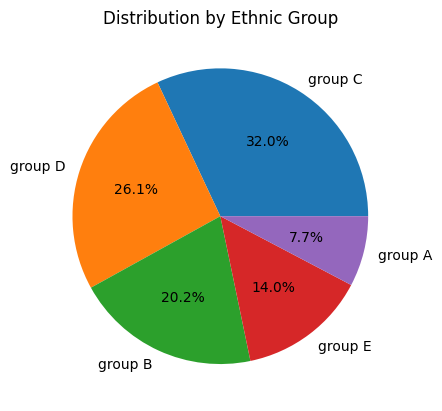

In [43]:
ethnic_counts = df["EthnicGroup"].value_counts()
plt.pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%')
plt.title("Distribution by Ethnic Group")
plt.show()

Text(0.5, 1.0, 'Correlation between Score Types')

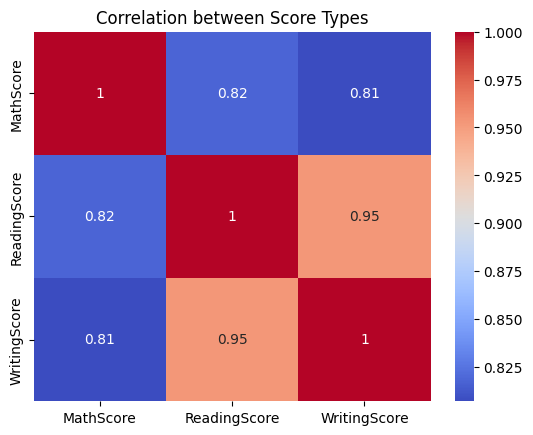

In [45]:
sns.heatmap(df[['MathScore', 'ReadingScore', 'WritingScore']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Score Types")

Text(0.5, 1.0, 'Study Hours vs Math Score')

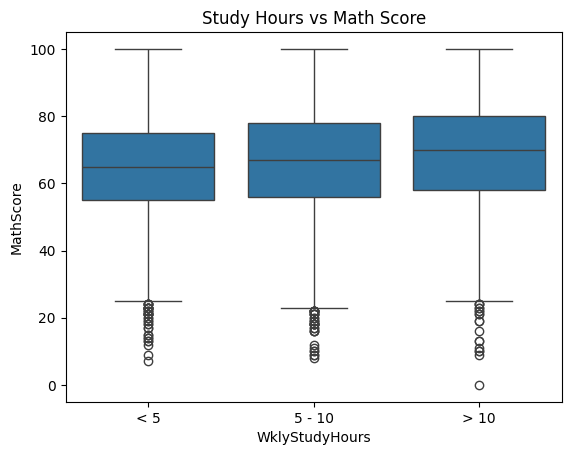

In [46]:
sns.boxplot(data=df, x='WklyStudyHours', y='MathScore')
plt.title("Study Hours vs Math Score")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2216\2175165920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='WklyStudyHours', y='MathScore', palette="muted")


Text(0.5, 1.0, 'Study Hours vs Math Score (Violin Plot)')

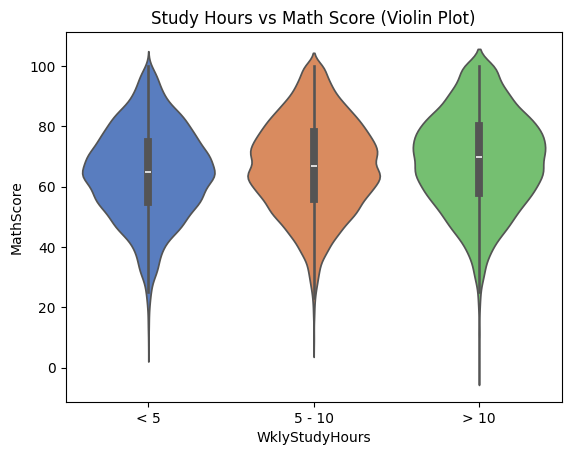

In [47]:
sns.violinplot(data=df, x='WklyStudyHours', y='MathScore', palette="muted")
plt.title("Study Hours vs Math Score (Violin Plot)")

## ✅ **Final Summary (What Your Analysis Shows)**

| Insight                | Conclusion                          |
| ---------------------- | ----------------------------------- |
| 📊 Gender Distribution | More female students in the dataset |
| 🧠 Parent Education    | Strong impact on student scores     |
| 💍 Marital Status      | Minor/no impact                     |
| 📉 Score Analysis      | Students are weaker in Math         |
| 🌐 Ethnic Distribution | Group C is most common              |
| ⚠️ Data Quality        | Some missing values to handle       |